In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl

plt.style.use('ggplot')
# pd.options.mode.chained_assignment = None

In [2]:
New_folder = 'Munawwir' #input('insert your name ')
os.mkdir(New_folder)
os.chdir(New_folder)

In [3]:
#define rule

start = '2019-01-02'
end = '2019-12-31'
tickers = ['XOM','6902.T'] #input('2 Stock\'s Ticker name').split(' ')
MA = 50 #input('MA days')

# Get Data

In [4]:
#get data

close = pd.DataFrame()

for ticker in tickers:  
    close[ticker] = yf.download(ticker,start,end)['Close']

close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,XOM,6902.T
Date,,
2019-01-02,69.690002,NaN
2019-01-03,68.620003,NaN
2019-01-04,71.150002,4807.0
2019-01-07,71.519997,4950.0
2019-01-08,72.040001,5011.0
...,...,...
2019-12-23,70.290001,5051.0
2019-12-24,70.019997,5020.0
2019-12-26,70.129997,5021.0


In [5]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-01-02 to 2019-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XOM     251 non-null    float64
 1   6902.T  233 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [6]:
df = []

for stock in close:
    df.append(close[[stock]].dropna())

In [7]:
for data in df:
    data['MA {}'.format(MA)] = data.rolling(window=MA).mean().shift()

# Plot Graph

In [8]:
def Generate_Plot(df):
    plt.figure(figsize=(12,8))
    plt.plot(df)
    plt.title(df.columns[0])
    plt.legend(labels = ['Close','MA {}'.format(MA)], fontsize='large')
    plt.savefig('{} Close vs MA {}.jpeg'.format(df.columns[0],MA), dpi=300)

    plt.show()

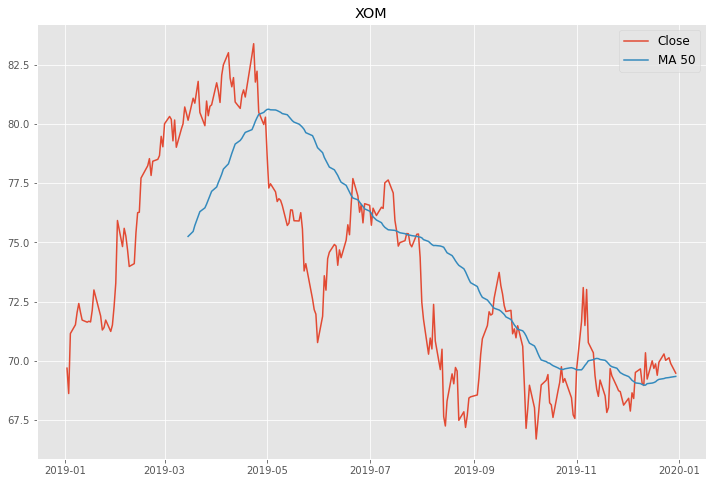

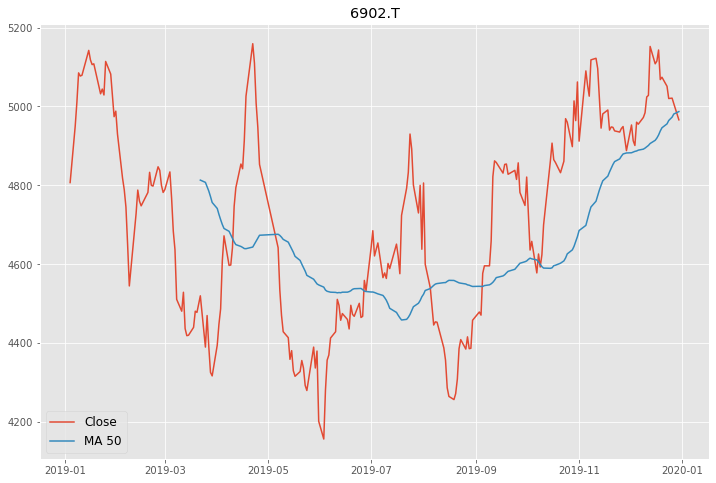

In [9]:
for data in df:
    Generate_Plot(data)

## Mean, Standard Deviation, Geomean and CoVariance

In [10]:
# calculate percentage change (return)
for data in df:
    data['Return'] = data.iloc[:,[0]].pct_change()

In [11]:
def geo_mean(a):
#     a = np.array(iterable)
#     a = a[~np.isnan(a)]
    a = np.array(a)
    a = a+1
    a = a.prod()**(1/len(a)) - 1
    return a

In [12]:
def summary(ret):
    report = ret.agg(['mean','std']) 
    g = pd.Series(geo_mean(ret), index=['Geo Mean'])
    report = report.append(g)
    return report

In [13]:
def Analyze(reports):
    final = pd.concat(reports,axis=1)
    final.columns = tickers
    return final    

In [14]:
reports = []

for data in df:
    reports.append(summary(data['Return'].dropna()))

In [15]:
reports

[mean        0.000056
 std         0.011672
 Geo Mean   -0.000012
 dtype: float64,
 mean        0.000240
 std         0.014144
 Geo Mean    0.000140
 dtype: float64]

In [16]:
ret = pd.DataFrame()

for data in df:
    ret = pd.concat([ret,data['Return']], axis=1)

ret.columns = tickers
ret

,XOM,6902.T
2019-01-02,NaN,NaN
2019-01-03,-0.015354,NaN
2019-01-04,0.036870,NaN
2019-01-07,0.005200,0.029748
2019-01-08,0.007271,0.012323
...,...,...
2019-12-23,0.005004,-0.004533
2019-12-24,-0.003841,-0.006137
2019-12-26,0.001571,0.000199
2019-12-27,-0.003422,-0.002788


In [17]:
ret.cov()

,XOM,6902.T
XOM,0.000136,0.000018
6902.T,0.000018,0.000200


In [18]:
Cov = ret.cov().iloc[0,1]
Cov

1.8044535036301656e-05

In [19]:
Analyze(reports)

,XOM,6902.T
mean,0.000056,0.000240
std,0.011672,0.014144
Geo Mean,-0.000012,0.000140


# Create Workbook

In [20]:
#save excel file
for num, data in enumerate(df):
    data.to_excel('Stock {}.xlsx'.format(tickers[num]))

In [21]:
wb1 = openpyxl.load_workbook('Stock {}.xlsx'.format(tickers[0]))
wb2 = openpyxl.load_workbook('Stock {}.xlsx'.format(tickers[1]))

In [22]:
wbs = [wb1, wb2]

In [23]:
sheet1 = wb1['Sheet1']
sheet2 = wb2['Sheet1']

In [24]:
sheets = [sheet1, sheet2]

In [25]:
def Update_excel(sheet, report, cov):
    value = {'Mean':report[0], 'Std':report[1],'Geomean':report[2],'Covariance':cov}
    for row, v in enumerate(value):
        sheet['f{}'.format(row+1)].value = v
    for row, v in enumerate(value):
        sheet['g{}'.format(row+1)].value = value[v]

In [26]:
for num, sheet in enumerate(sheets):
    Update_excel(sheet,reports[num],Cov)

In [27]:
for num, wb in enumerate(wbs):
    wb.save('Stock {}.xlsx'.format(tickers[num]))

In [28]:
a = np.array([0.2,0.4,-0.1,0.5])
b = np.array([0.1,0.05,0.2,0.15])

q = pd.DataFrame({'a':a,'b':b})
q.cov()

,a,b
a,0.07,-0.010000
b,-0.01,0.004167
